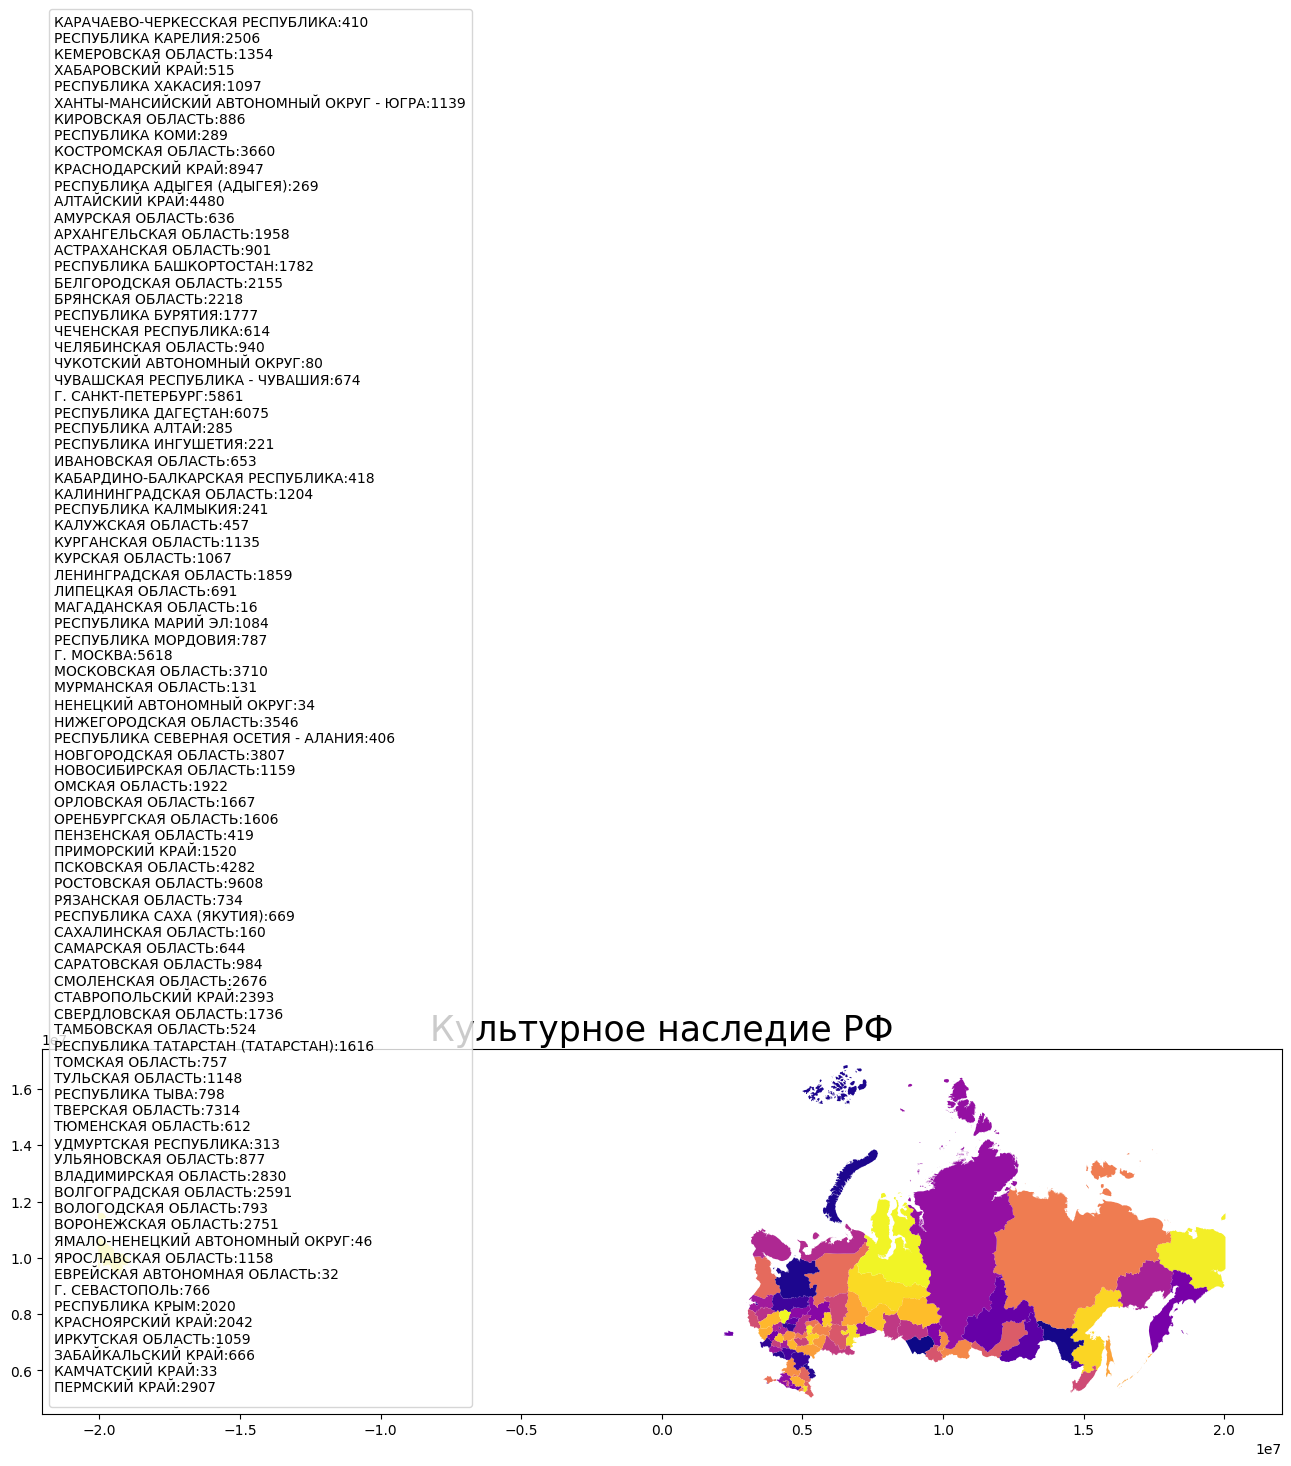

0    АЛТАЙСКИЙ КРАЙ:4480
Name: Title, dtype: object


In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

import warnings
warnings.filterwarnings("ignore")
kult_nasl=pd.read_csv("https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz",   usecols=["Объект","Регион"])
kult_nasl['Регион']=kult_nasl['Регион'].str.upper()
data_nasl=kult_nasl.groupby('Регион').count().reset_index()


data_russia=gpd.read_file("https://video.ittensive.com/python-advanced/russia.json")
data_russia = data_russia.to_crs({'init': 'epsg:3857'})
data_russia["NL_NAME_1"]=data_russia["NL_NAME_1"].str.upper()
data_russia=data_russia.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ" :"ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ" : "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    'РЕСПУБЛИКА МАРИЙ-ЭЛ' :"РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ":"РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})

data = pd.merge(left=data_russia, right=data_nasl, 
                left_on="NL_NAME_1", right_on="Регион", how="left")
data['Title']=data['Регион'].astype(str)+ ':' +data['Объект'].astype(str)

fig=plt.figure(figsize=(16, 20))
area=plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="Регион", cmap="plasma")
area.legend([], title="\n".join(data.Title), loc="lower left")

plt.title("Культурное наследие РФ", fontsize=25)
plt.show()
altai=data.loc[data['Регион'] == 'АЛТАЙСКИЙ КРАЙ']
altai=altai.reset_index()
print (altai['Title'])


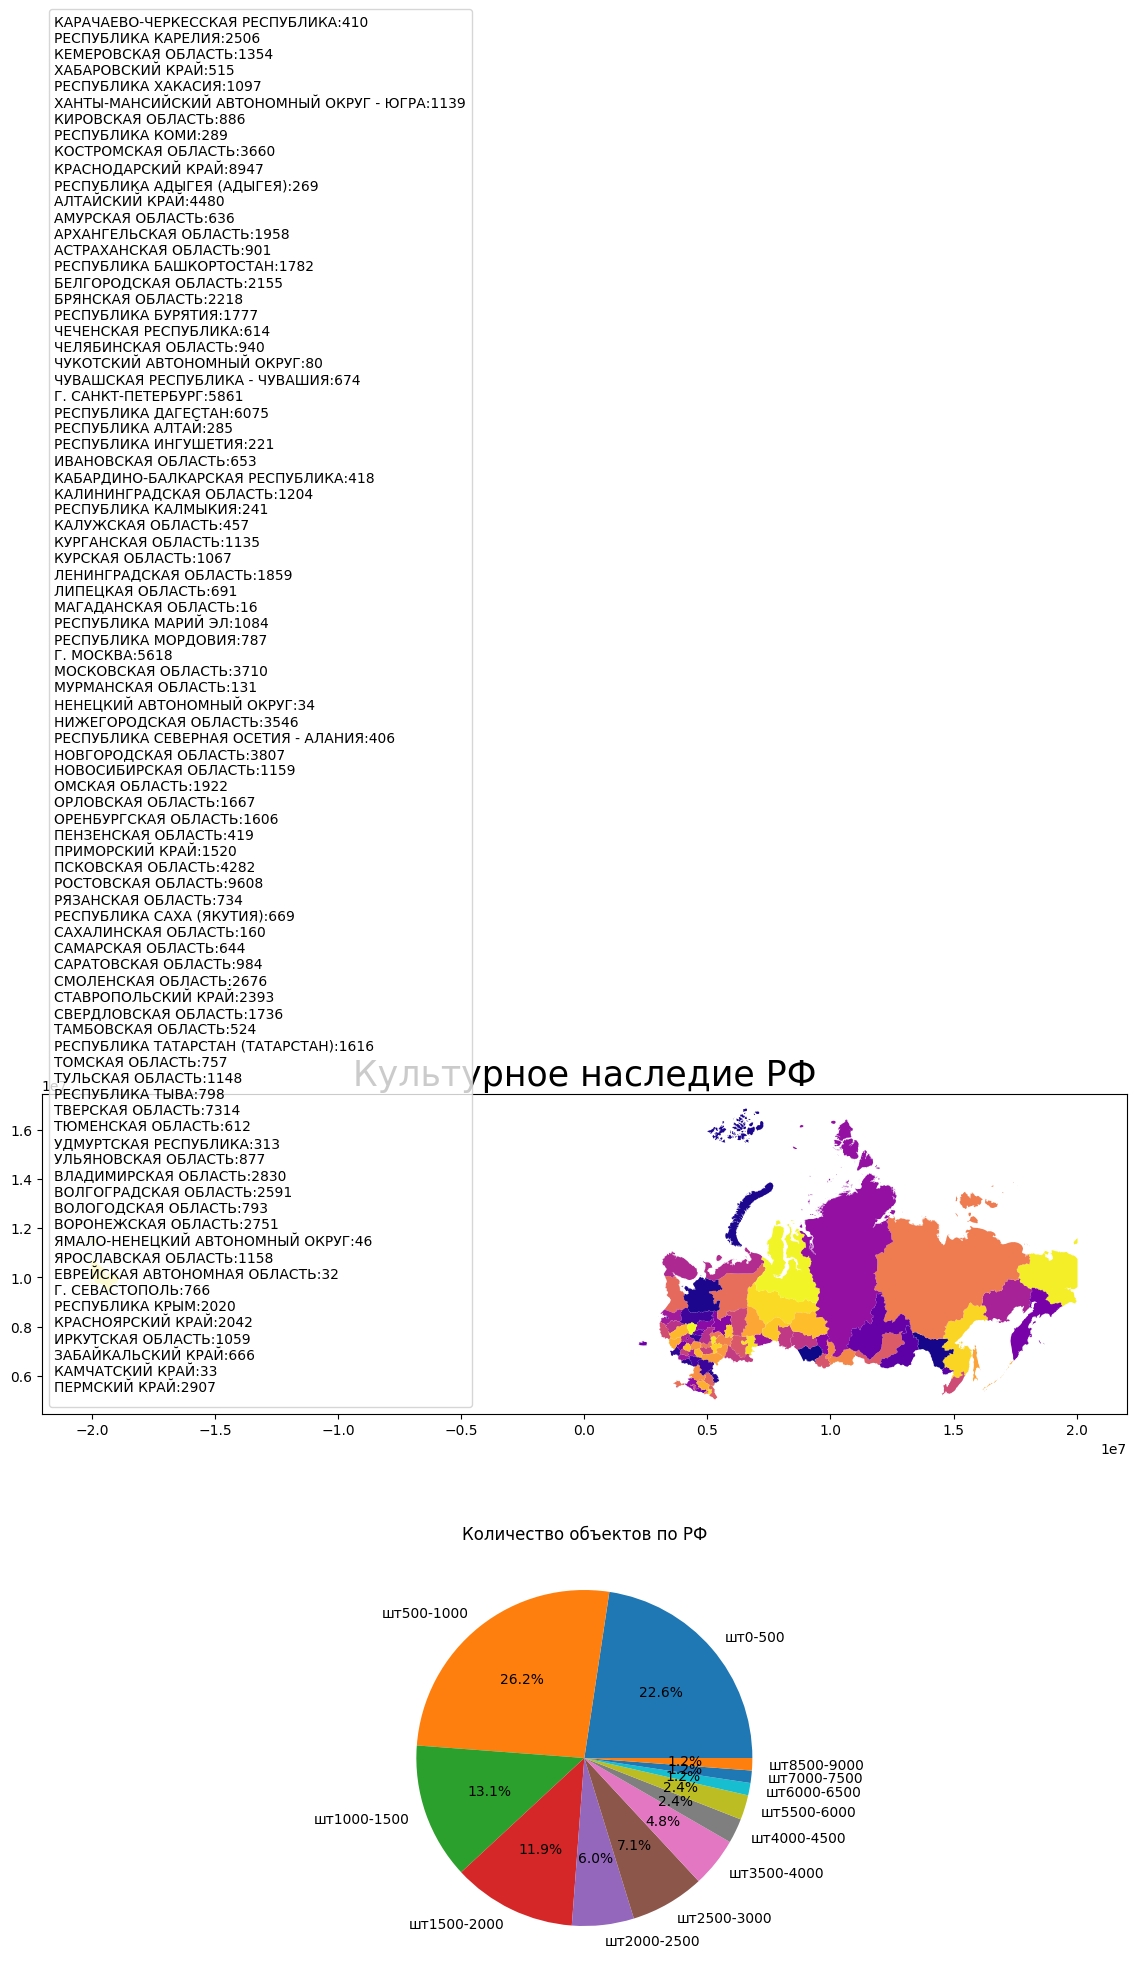

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import pandas as pd
import descartes

import warnings
warnings.filterwarnings("ignore")
kult_nasl=pd.read_csv("https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz",   usecols=["Объект","Регион"])
kult_nasl['Регион']=kult_nasl['Регион'].str.upper()
data_nasl=kult_nasl.groupby('Регион').count().reset_index()
data_russia=gpd.read_file("https://video.ittensive.com/python-advanced/russia.json")
data_russia = data_russia.to_crs({'init': 'epsg:3857'})
data_russia["NL_NAME_1"]=data_russia["NL_NAME_1"].str.upper()
data_russia=data_russia.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ" :"ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ" : "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    'РЕСПУБЛИКА МАРИЙ-ЭЛ' :"РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ":"РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})

data = pd.merge(left=data_russia, right=data_nasl, 
                left_on="NL_NAME_1", right_on="Регион", how="left")
data['Title']=data['Регион'].astype(str)+ ':' +data['Объект'].astype(str)
#print (data)
kult_nasl_red=data['Объект']#Создадим отдельный набор данных по количеству объектов
#print (kult_nasl_red.max())#получили минимально  значение 16 , максимальное значение 9608
import numpy as np
'''Создадим набор данных по количеству культурных объектов в заданных параметрах. Их количество в регионе по заданным 
критериям'''
count, labels=np.histogram(kult_nasl_red, bins=np.arange(0, 10000, 500))
#print (count)
labels=['шт'+str(labels[i])+'-'+str(labels[i+1]) for i, _ in enumerate(labels[1:])]
#print (labels)
non_zero=[i for i, x in enumerate(count) if x !=0]# Созданы условия отбраковки значения 0
labels=[e for i, e in enumerate(labels) if i in non_zero]#Отбросили интервалы соответствующие которым количество объектов равно нулю
count=[e for i, e in enumerate(count) if i in non_zero]#отбросим нуливые значения

data = pd.merge(left=data_russia, right=data_nasl, 
                left_on="NL_NAME_1", right_on="Регион", how="left")
data['Title']=data['Регион'].astype(str)+ ':' +data['Объект'].astype(str)

fig=plt.figure(figsize=(14, 12))
area=plt.subplot(2, 1, 1)
data.plot(ax=area, legend=True, column="Регион", cmap="plasma")
area.legend([], title="\n".join(data.Title), loc="lower left")

plt.title("Культурное наследие РФ", fontsize=25)
area=plt.subplot(2, 1, 2)
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title("Количество объектов по РФ")
plt.show()
